In [108]:
# Beckham Carver
# 7/19/2024
# Exploratory Data Analysis
# COSC 4557

# Sources:
- https://www.kaggle.com/datasets/jpmiller/police-violence-in-the-us
- https://www.unitedstateszipcodes.org/zip-code-database/population/
- https://stackoverflow.com/questions/20297317/python-dataframe-pandas-drop-column-using-int
- https://datascientyst.com/convert-column-to-categorical-pandas-dataframe-examples/
- https://stackoverflow.com/questions/36684013/extract-column-value-based-on-another-column-in-pandas
- https://stackoverflow.com/questions/50449088/check-if-value-from-one-dataframe-exists-in-another-dataframe
- https://www.slingacademy.com/article/understanding-dataframe-transform-method-in-pandas-5-examples/
- https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
- https://seaborn.pydata.org/tutorial/categorical.html
- https://stackoverflow.com/questions/39880627/in-pandas-how-to-delete-rows-from-a-data-frame-based-on-another-data-frame
- RTodd had some good starter data verification functions in warmup, this led me to the sklearn docs and explored from there
- ChatGPT for a now unused checkpoint

# __
I ended up choosing a pretty heavy topic for the data analysis, that being a 'Police Violence & Racial Equity' dataset from Kaggle, as well as a zipcode database that gives the IRS estimated population. (As a sidenote I'd bet the IRS undercounts compared to Census data, and that discrepency in population likely correlates with crime rates. But that is not what I'll be exploring.) I would like to explore the correlation between population/geography with transparency/efficacy of police departments regarding documentation and court results of the incidents. My hypothesis is that areas that are more rural with a smaller population will on average be less transparent. Transparency meaning lack of released images and body camera footage; as well as the presence of unreleased names, pending cases, and unknown/unclear values. The population data set estimates from 2010 data, and the police violence set is from 2014-2019- this is not a perfect match but close enough to find trends. This data is heavily categorical, with population and age really being the only numeric data, this eliminates quite a few plots from being very useful.

# __
For handling the data, I started by opening up both CSV's with the 'data wrangler' extension for VScode. This is really useful for not only displaying the data, but scripting/modifying it in a separate environment. I began by working with the police_killings_MPV dataset.

In [109]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random

plt.rcParams['font.size'] = 10.0

dfp = pd.read_csv('rawdata/police-statistics\police_killings_MPV.csv')
dfp


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
C:\Users\beckcarver\AppData\Local\Temp\ipykernel_16160\3831468739.py:9: SyntaxWarning: invalid escape sequence '\p'
  dfp = pd.read_csv('rawdata/police-statistics\police_killings_MPV.csv')
C:\Users\beckcarver\AppData\Local\Temp\ipykernel_16160\3831468739.py:9: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dfp = pd.read_csv('rawdata/police-statistics\police_killings_MPV.csv')


,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Name withheld by police,Unknown,Male,Unknown race,NaN,06/09/2020,337 Garrison Place,Virginia Beach,VA,23452.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name withheld by police,Unknown,Male,Unknown race,NaN,05/09/2020,4900 South Lavergne Avenue,Chicago,IL,60638.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name withheld by police,61,Male,Unknown race,NaN,05/09/2020,2118 Fredericksburg Rd,San Antonio,TX,78201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Name withheld by police,22,Male,Unknown race,NaN,05/09/2020,2500 Logistics Drive,Battle Creek,MI,49037.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Steven D. Smith,33,Male,Unknown race,NaN,04/09/2020,200 N. State Street,Syracuse,NY,13203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,01/01/2013,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8423,Abel Gurrola,26,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,01/01/2013,720 Terrace Way,Bakersfield,CA,93304.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8424,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,01/01/2013,3727 N. 42nd St.,Omaha,NE,68111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8425,Mark Chavez,49,Male,Hispanic,http://www.tricitytribuneusa.com/wp-content/up...,01/01/2013,912 Loma Linda Ave.,Farmington,NM,87401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
dfp.axes

[RangeIndex(start=0, stop=8427, step=1),
 Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
        'URL of image of victim', 'Date of Incident (month/day/year)',
        'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
        'Agency responsible for death', 'ORI Agency Identifier (if available)',
        'Cause of death',
        'A brief description of the circumstances surrounding the death',
        'Official disposition of death (justified or other)',
        'Criminal Charges?',
        'Link to news article or photo of official document',
        'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
        'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
        'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
        'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
        'Off-Duty Killing?',
        'Geography (via Trulia methodology based 

# __
Immediately (and in the data wrangler) I see columns 29-67 are unused. This could be a problem with the CSV header, but I can just drop the columns from the dataframe. I will also drop the ID columns, rename necessary columns and check for nulls.

In [111]:
dfp.drop(dfp.columns[range(29,68)], axis=1,inplace=True)
dfp.drop(['WaPo ID (If included in WaPo database)','Fatal Encounters ID', 'MPV ID'], axis=1, inplace=True)

dfp.rename(columns={'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )' : 'Geography'}, inplace=True)
dfp.rename(columns={'Official disposition of death (justified or other)' : 'Official Disposition'}, inplace=True)
dfp.rename(columns={'Date of Incident (month/day/year)' : 'Date'}, inplace=True)
dfp.rename(columns={'Victim\'s name' : 'Name'}, inplace=True)
dfp.rename(columns={'Victim\'s age' : 'Age'}, inplace=True)
dfp.rename(columns={'Victim\'s gender' : 'Gender'}, inplace=True)
dfp.rename(columns={'Victim\'s race' : 'Race'}, inplace=True)
dfp.rename(columns={'Unarmed/Did Not Have an Actual Weapon' : 'Armed?'}, inplace=True)

dfp.isnull().sum()

Name                                                                                  0
Age                                                                                   0
Gender                                                                               12
Race                                                                                  0
URL of image of victim                                                             3888
Date                                                                                  0
Street Address of Incident                                                           87
City                                                                                  6
State                                                                                 0
Zipcode                                                                              36
County                                                                               14
Agency responsible for death    

# __
I will be pretty selective of what nulls to prune, in some cases a null is a useful category, in others we can omit the row. I will omit nulls in Zipcode, Agency/ORI, and Geography.

In [112]:
dfp.dropna(subset=['Zipcode', 'Agency responsible for death', 'ORI Agency Identifier (if available)', 'Geography', 'Armed?', 'Symptoms of mental illness?'], inplace=True)
dfp.isnull().sum()

Name                                                                                  0
Age                                                                                   0
Gender                                                                                9
Race                                                                                  0
URL of image of victim                                                             3847
Date                                                                                  0
Street Address of Incident                                                           66
City                                                                                  3
State                                                                                 0
Zipcode                                                                               0
County                                                                                1
Agency responsible for death    

In [113]:
dfp['URL of image of victim'] = dfp['URL of image of victim'].transform(lambda x: False if pd.isna(x) or pd.isnull(x) else True)
dfp['Age'] = dfp['Age'].transform(lambda x: 'Unknown' if str.lower(x).replace(' ', '') in ['unknown', 'unkown', 'uknown'] else x.replace('s', ''))
dfp['Link to news article or photo of official document'] = dfp['Link to news article or photo of official document'].transform(lambda x: False if pd.isna(x) or pd.isnull(x) else True)
dfp['Body Camera (Source: WaPo)'] = dfp['Body Camera (Source: WaPo)'].transform(lambda x: False if pd.isna(x) or pd.isnull(x) or x in ['Off-Duty', 'Off-duty', 'off-duty'] else True)
dfp['Symptoms of mental illness?'] = dfp['Symptoms of mental illness?'].transform(lambda x: 'Unknown' if str.lower(x).replace(' ', '') in ['unknown', 'unkown', 'uknown'] else x)
dfp['Off-Duty Killing?'] = dfp['Off-Duty Killing?'].transform(lambda x: False if pd.isna(x) or pd.isnull(x) or x == 'No' else True)
dfp['Armed?'] = dfp['Armed?'].transform(lambda x: 'Unclear' if pd.isna(x) or pd.isnull(x) or x == 'No' else x)
dfp['Armed?'] = dfp['Armed?'].transform(lambda x: 'Unarmed' if x == 'Unarmed/Did Not Have an Actual Weapon' else x)
dfp['Off-Duty Killing?'] = dfp['Off-Duty Killing?'].transform(lambda x: False if pd.isna(x) or pd.isnull(x) or x == 'No' else True)

In [114]:
dfp.dtypes

Name                                                                                object
Age                                                                                 object
Gender                                                                              object
Race                                                                                object
URL of image of victim                                                                bool
Date                                                                                object
Street Address of Incident                                                          object
City                                                                                object
State                                                                               object
Zipcode                                                                            float64
County                                                                              object

# __
Looking at the data types, most categorical variables are still listed as objects, such as gender, race, Zipcode, Geography etc. I'll make these categorical and then plot them to get an idea of what else needs to be cleaned. 

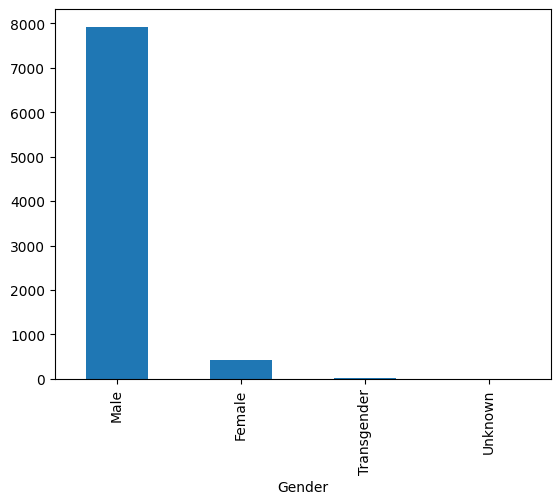

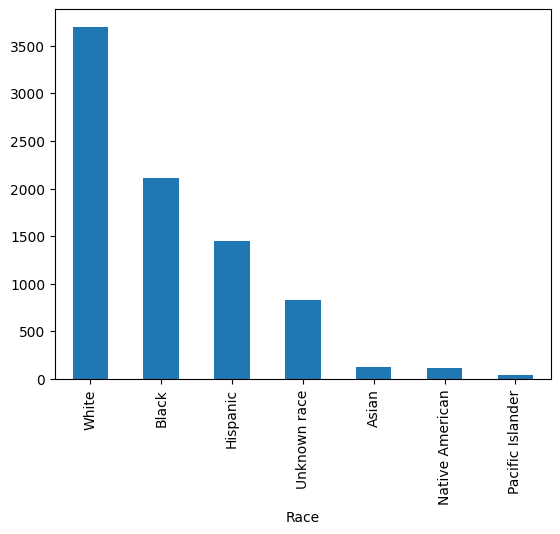

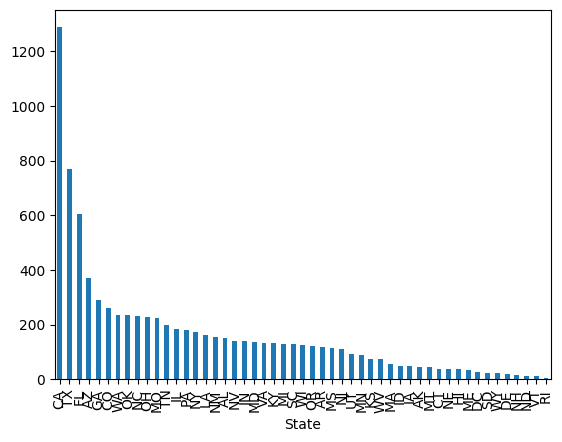

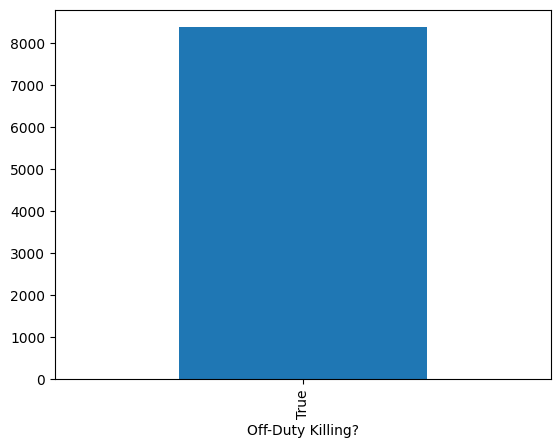

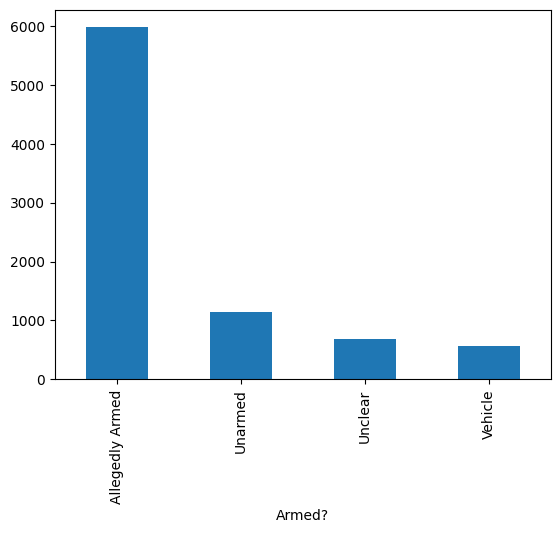

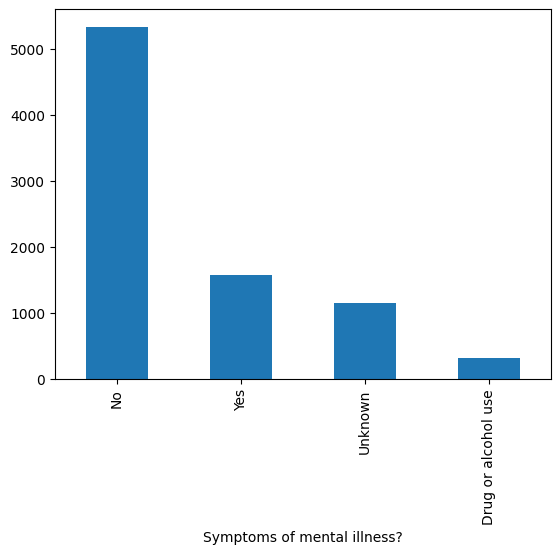

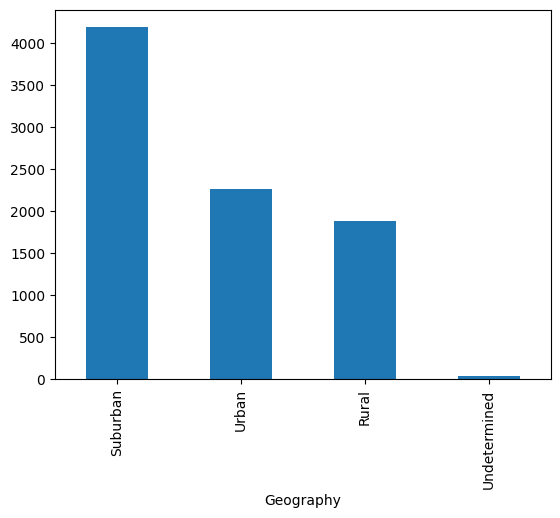

In [115]:
dfp['Gender'] = dfp['Gender'].astype('category')
dfp['Race'] = dfp['Race'].astype('category')
dfp['City'] = dfp['City'].astype('category')
dfp['State'] = dfp['State'].astype('category')
dfp['Zipcode'] = dfp['Zipcode'].astype('int64')
dfp['County'] = dfp['County'].astype('category')
dfp['Agency responsible for death'] = dfp['Agency responsible for death'].astype('category')
dfp['Off-Duty Killing?'] = dfp['Off-Duty Killing?'].astype('category')
dfp['Geography'] = dfp['Geography'].astype('category')
dfp['Armed?'] = dfp['Armed?'].astype('category')
dfp['Symptoms of mental illness?'] = dfp['Symptoms of mental illness?'].astype('category')

dfp['Gender'].value_counts().plot(kind='bar')
plt.show()
dfp['Race'].value_counts().plot(kind='bar')
plt.show()
dfp['State'].value_counts().plot(kind='bar')
plt.show()
dfp['Off-Duty Killing?'].value_counts().plot(kind='bar')
plt.show()
dfp['Armed?'].value_counts().plot(kind='bar')
plt.show()
dfp['Symptoms of mental illness?'].value_counts().plot(kind='bar')
plt.show()
dfp['Geography'].value_counts().plot(kind='bar')
plt.show()

###### It is tremendously concerning that WY ranks 45th in killings when it is by a WIDE MARGIN the smallest in population. These graphs are depressing in general, as expected.

# __
The last variable I would like to make categorical is Official Disposition. This has 133 unique values, in this step I'll group them by keywords, and drop entries that don't fit them. The categories in the end being pending, charged, unreported, and unknown.

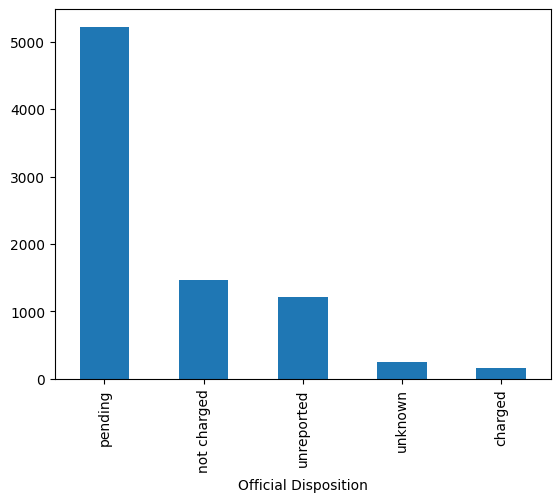

In [116]:
dfp['Official Disposition'] = dfp['Official Disposition'].astype('category')
dfp['Official Disposition'].value_counts()

def categorize(disposition):
    if pd.isna(disposition) or pd.isnull(disposition): return 'unreported'
    x = str(disposition).lower()
    if 'pending' in x or 'no known charges' in x: return 'pending'
    if 'unknown' in x: return 'unknown'
    if 'unreported' in x: return 'unreported'
    if 'justified' in x or 'aquit' in x or 'cleared' in x: return 'not charged'
    if 'charged' in x or 'convicted' in x or 'guilty' in x or 'murder' in x or 'family awarded' in x or 'civil suit' in x: return 'charged'
    return pd.NA

dfp['Official Disposition'] = dfp['Official Disposition'].transform(lambda x: categorize(x))
dfp.dropna(subset=['Official Disposition'], inplace=True)
dfp['Official Disposition'] = dfp['Official Disposition'].astype('category')

dfp['Official Disposition'].value_counts().plot(kind='bar')
plt.show()

# __
With the data relatively cleaned I'll add in the Zipcode population data where it matches, and trim wherever no population data is available. Same goes for matching zipcodes in the census data.

In [117]:
dfz = pd.read_csv('rawdata/zip_code_database.csv')
dfz = dfz.filter(['zip', 'irs_estimated_population'])
dfz.drop_duplicates(subset=['zip'], keep='first', inplace=True)
dfz.dropna(inplace=True)
dfz.rename(columns={'zip':'Zipcode'}, inplace=True)

dfz.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42735 entries, 0 to 42734
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Zipcode                   42735 non-null  int64
 1   irs_estimated_population  42735 non-null  int64
dtypes: int64(2)
memory usage: 667.9 KB


In [118]:
dfi = pd.read_csv('rawdata/median-income-5yr-2020/ACSST5Y2020.S1901-Data.csv',header=1)
dfi = dfi.filter(['Geographic Area Name','Estimate!!Households!!Median income (dollars)','Estimate!!Households!!Total', 'Estimate!!Households!!Mean income (dollars)'])
dfi.rename(columns={'Estimate!!Households!!Median income (dollars)':'Household Median Income'}, inplace=True)
dfi.rename(columns={'Estimate!!Households!!Total':'Total Households'}, inplace=True)
dfi.rename(columns={'Estimate!!Households!!Mean income (dollars)':'Household Mean Income'}, inplace=True)
dfi.rename(columns={'Geographic Area Name':'Zipcode'}, inplace=True)

dfi.drop_duplicates(subset=['Zipcode'], keep='first')
dfi.dropna(inplace=True)

dfi['Zipcode'] = dfi['Zipcode'].apply(lambda x : x.removeprefix('ZCTA5 '))
dfi['Household Mean Income'] = dfi['Household Mean Income'].transform(lambda x: 0 if pd.isna(x) or pd.isnull(x) or x == 'N' or x == '-' else x.replace('2,500-', '1250').replace('250,000+', str(random.randrange(250000,1000000, 500)))) # crude rounding
dfi['Household Median Income'] = dfi['Household Median Income'].transform(lambda x: 0 if pd.isna(x) or pd.isnull(x) or x == 'N' or x == '-' else x.replace('2,500-', '1250').replace('250,000+', str(random.randrange(250000,1000000, 500)))) # crude rounding

dfi['Zipcode'] = dfi['Zipcode'].astype('int64')
dfi['Total Households'] = dfi['Total Households'].astype('int64')
dfi['Household Median Income'] = dfi['Household Median Income'].astype('int64')
dfi['Household Mean Income'] = dfi['Household Mean Income'].astype('int64')

print(dfi.describe().T)
dfi.info()


                           count          mean           std    min       25%  \
Zipcode                  33120.0  49666.334209  27564.925769  601.0  26634.75   
Household Median Income  33120.0  58907.586141  36034.896047    0.0  42832.75   
Total Households         33120.0   3730.548490   5396.181697    0.0    272.00   
Household Mean Income    33120.0  76852.308364  39159.095947    0.0  56908.50   

                             50%       75%       max  
Zipcode                  49739.0  72123.50   99929.0  
Household Median Income  55873.5  72223.00  999000.0  
Total Households          1081.0   5118.75   41335.0  
Household Mean Income    70582.5  89517.50  642713.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Zipcode                  33120 non-null  int64
 1   Household Median Income  33120 non-null  int64
 2 

In [119]:
def search(searchVal, df : pd.DataFrame, searchCol :str, returnCol :str):
    ret = df.loc[df[searchCol] == searchVal, returnCol]
    if (ret.size == 0): # catch-all 
        #print("WHY WHY WHY these should be 1-1") # this is so stupid lost an hour of my life to TWO zipcodes hating me ???? It changed to like 30 zipcodes? After nearly no code changes
        #print(zipcode)
        return pd.NA
    else:
        return int(ret.iloc[0])
    
#dfi = dfi[dfi['Geographic Area Name'].isin(dfz['zip'])] # remove non-matching zips
#dfz = dfz[dfz['zip'].isin(dfi['Geographic Area Name'])] # remove non-matching zips

#dfp = dfp[dfp['Zipcode'].isin(dfz['Zipcode'])]                  #
#dfp = dfp[dfp['Zipcode'].isin(dfi['Zipcode'])] # Intersect w/ both

#dfp['irs_pop'] = dfp['Zipcode'].apply(lambda x: search(x, dfi, 'Zipcode', 'irs_estimated_population'))
#dfp['Household Median Income'] = dfp.apply(lambda x: search(x, dfi, 'Zipcode', 'Household Median Income'))
#dfp['Household Mean Income'] = dfp.apply(lambda x: search(x, dfi, 'Zipcode', 'Household Mean Income'))
#dfp['Total Households'] = dfp.apply(lambda x: search(x, dfi, 'Zipecode', 'Total Households'))
#dfp.dropna(subset=['irs_pop'], inplace=True)
#dfp

# I found out that pandas has a solid merge function. So much for everything above.

dfi = pd.merge(dfi, dfz, on=['Zipcode'], how="outer", indicator=True)
dfi = dfi.loc[dfi["_merge"] == "both"].drop("_merge", axis=1)

dfp = pd.merge(dfp, dfi, on=['Zipcode'], how="outer", indicator=True)
dfp = dfp.loc[dfp["_merge"] == "both"].drop("_merge", axis=1)
dfp

,Name,Age,Gender,Race,URL of image of victim,Date,Street Address of Incident,City,State,Zipcode,...,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),Off-Duty Killing?,Geography,Household Median Income,Total Households,Household Mean Income,irs_estimated_population
183,Douglas Musto,28,Male,Unknown race,False,07/04/2013,128 Elm Street,Westfield,MA,1085,...,knife,NaN,NaN,False,True,Suburban,74784.0,15414.0,93893.0,34340.0
186,Peter Doherty,52,Male,White,True,05/04/2016,24 Myron St,West Springfield,MA,1089,...,knife,other,Not fleeing,True,True,Suburban,54516.0,12402.0,79946.0,25450.0
194,Wayne Edwards,23,Male,Black,False,11/08/2013,Interstate 91 and Interstate 291 interchange,Springfield,MA,1103,...,undetermined,NaN,NaN,False,True,Urban,17736.0,1385.0,37294.0,1620.0
199,David J. Kingsbury,34,Male,White,False,26/06/2014,128 Mill St.,Springfield,MA,1108,...,knife,NaN,NaN,False,True,Urban,41807.0,10031.0,58630.0,22810.0
200,Louis M. Squires,44,Male,Black,True,15/05/2013,18 Braddock St.,Springfield,MA,1109,...,gun,NaN,NaN,False,True,Urban,35000.0,9220.0,50867.0,22950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36097,Shawn Ray Wilson,48,Male,White,False,15/06/2019,798 High Grade Wy,Fairbanks,AK,99712,...,gun,attack,Not fleeing,True,True,Rural,89688.0,5413.0,112780.0,8490.0
36098,Garrett James Ebenal,28,Male,White,False,12/02/2019,2999-2701 Elliott Hwy,Fairbanks,AK,99712,...,gun,attack,Not fleeing,True,True,Rural,89688.0,5413.0,112780.0,8490.0
36103,Vincent Nageak III,36,Male,Native American,False,10/02/2016,7400 N Star St,Barrow,AK,99723,...,gun,attack,Not fleeing,True,True,Rural,87870.0,1360.0,97428.0,3630.0
36113,Daniel Duane Jensen Jr.,59,Male,White,True,07/01/2020,1399 Alaska Highway,Delta Junction,AK,99737,...,gun,attack,Not fleeing,True,True,Rural,73456.0,1490.0,81608.0,4060.0


# __
So yeah, I tried a lot of things and learned a lot of things in that step. Merging data can be an absolute pain... unless you use the pd.merge then it's easy. Indexes and Series gave me such a pain, I made helper functions used .apply and many other things. I finally just looked at merge and wow everything was solved.
With the data I plan to use cleaned and the population data connected, I can now remove any leftover columns I do not plan to use and start actually exploring the data for trends.

In [120]:
dfp.drop(['Name','Street Address of Incident', 'ORI Agency Identifier (if available)', 'Criminal Charges?','Cause of death', 
          'A brief description of the circumstances surrounding the death', 'Fleeing (Source: WaPo)',
          'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)', 'Alleged Threat Level (Source: WaPo)'  
          ], axis=1, inplace=True)

# Keep zipcode as int64 through merge proocess, then convert to string & category
dfp['Zipcode'] = dfp['Zipcode'].astype(str)
dfp['Zipcode'] = dfp['Zipcode'].astype('category')

print(dfp.info())
print(dfp.describe().T)
dfp

<class 'pandas.core.frame.DataFrame'>
Index: 8311 entries, 183 to 36166
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   Age                                                 8311 non-null   object  
 1   Gender                                              8302 non-null   category
 2   Race                                                8311 non-null   category
 3   URL of image of victim                              8311 non-null   object  
 4   Date                                                8311 non-null   object  
 5   City                                                8309 non-null   category
 6   State                                               8311 non-null   category
 7   Zipcode                                             8311 non-null   category
 8   County                                              8310 non-null   ca

,Age,Gender,Race,URL of image of victim,Date,City,State,Zipcode,County,Agency responsible for death,...,Link to news article or photo of official document,Symptoms of mental illness?,Armed?,Body Camera (Source: WaPo),Off-Duty Killing?,Geography,Household Median Income,Total Households,Household Mean Income,irs_estimated_population
183,28,Male,Unknown race,False,07/04/2013,Westfield,MA,1085,Hampden,Westfield Police Department,...,True,No,Allegedly Armed,False,True,Suburban,74784.0,15414.0,93893.0,34340.0
186,52,Male,White,True,05/04/2016,West Springfield,MA,1089,Hampden,West Springfield Police Department,...,True,Yes,Allegedly Armed,True,True,Suburban,54516.0,12402.0,79946.0,25450.0
194,23,Male,Black,False,11/08/2013,Springfield,MA,1103,Hampden,Massachusetts State Police Department,...,True,No,Unclear,False,True,Urban,17736.0,1385.0,37294.0,1620.0
199,34,Male,White,False,26/06/2014,Springfield,MA,1108,Hampden,Springfield Police Department,...,True,Unknown,Allegedly Armed,False,True,Urban,41807.0,10031.0,58630.0,22810.0
200,44,Male,Black,True,15/05/2013,Springfield,MA,1109,Hampden,Springfield Police Department,...,True,No,Allegedly Armed,False,True,Urban,35000.0,9220.0,50867.0,22950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36097,48,Male,White,False,15/06/2019,Fairbanks,AK,99712,Fairbanks North Star,Alaska State Troopers,...,True,No,Allegedly Armed,True,True,Rural,89688.0,5413.0,112780.0,8490.0
36098,28,Male,White,False,12/02/2019,Fairbanks,AK,99712,Fairbanks North Star,Fairbanks Police Department,...,True,No,Allegedly Armed,True,True,Rural,89688.0,5413.0,112780.0,8490.0
36103,36,Male,Native American,False,10/02/2016,Barrow,AK,99723,North Slope,North Slope Borough Police Department,...,True,Unknown,Allegedly Armed,True,True,Rural,87870.0,1360.0,97428.0,3630.0
36113,59,Male,White,True,07/01/2020,Delta Junction,AK,99737,Southeast Fairbanks Census Area,"Alaska Department of Public Safety, North Pole...",...,True,No,Allegedly Armed,True,True,Rural,73456.0,1490.0,81608.0,4060.0


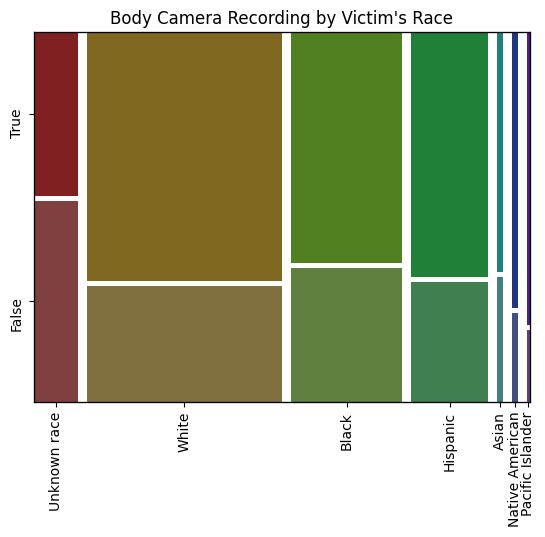

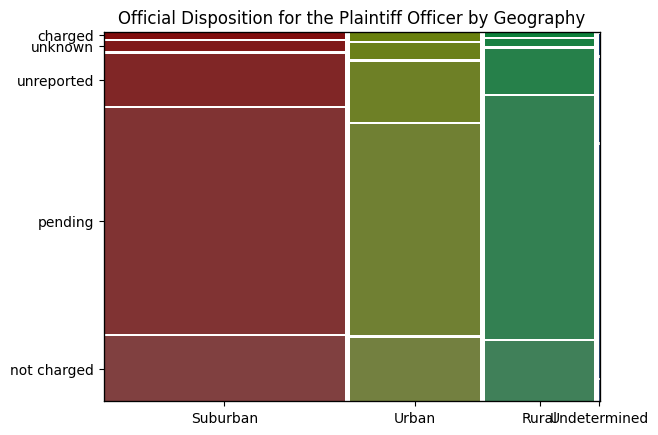

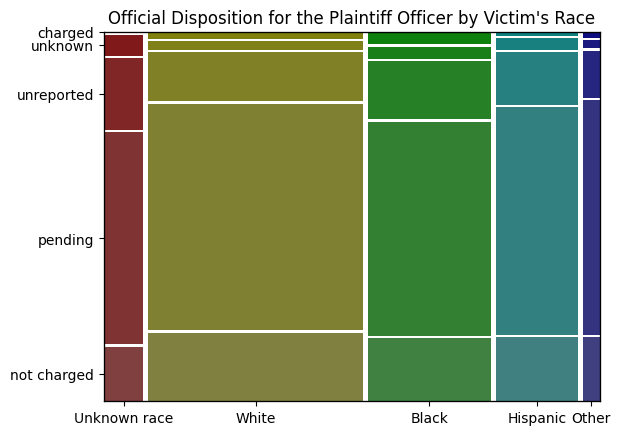

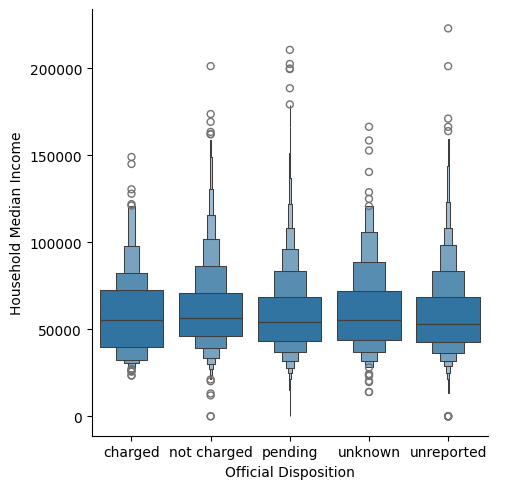

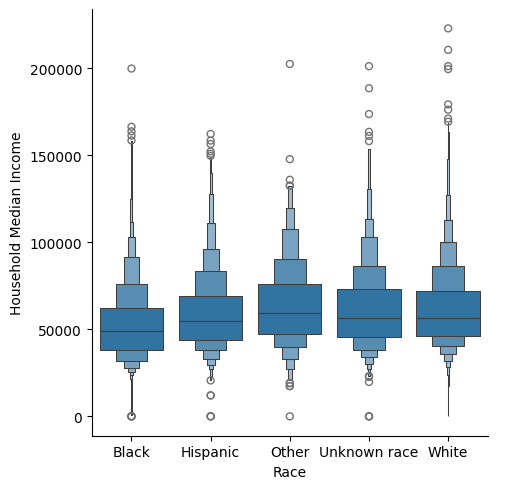

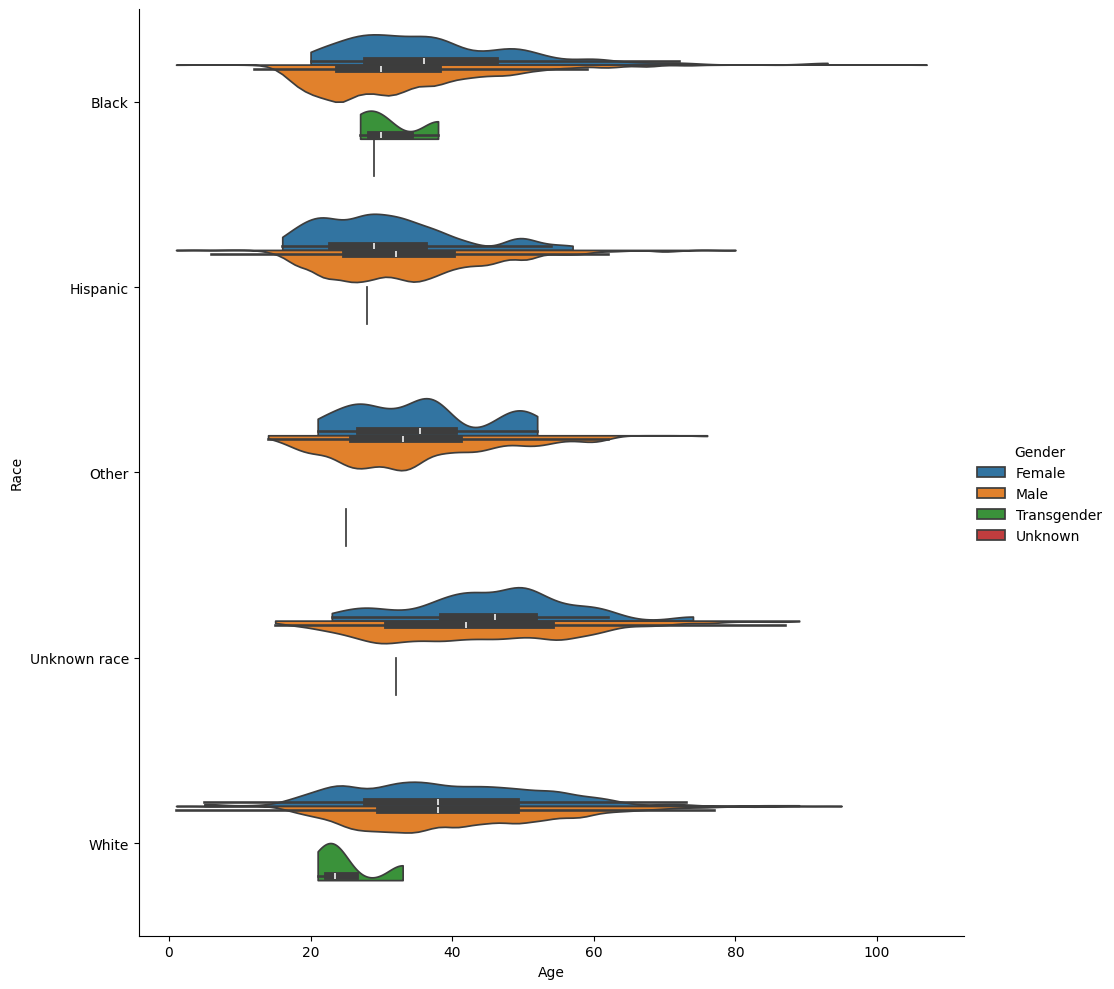

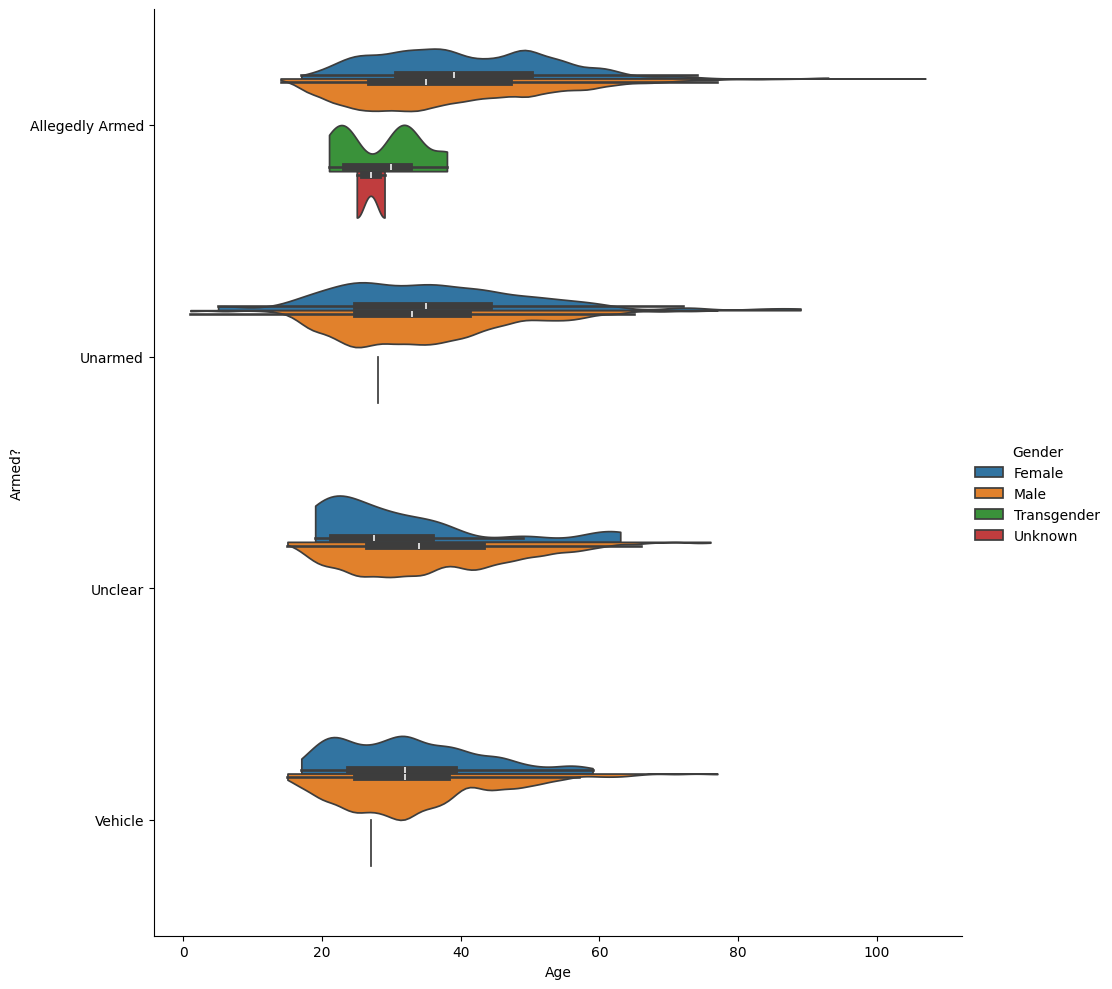

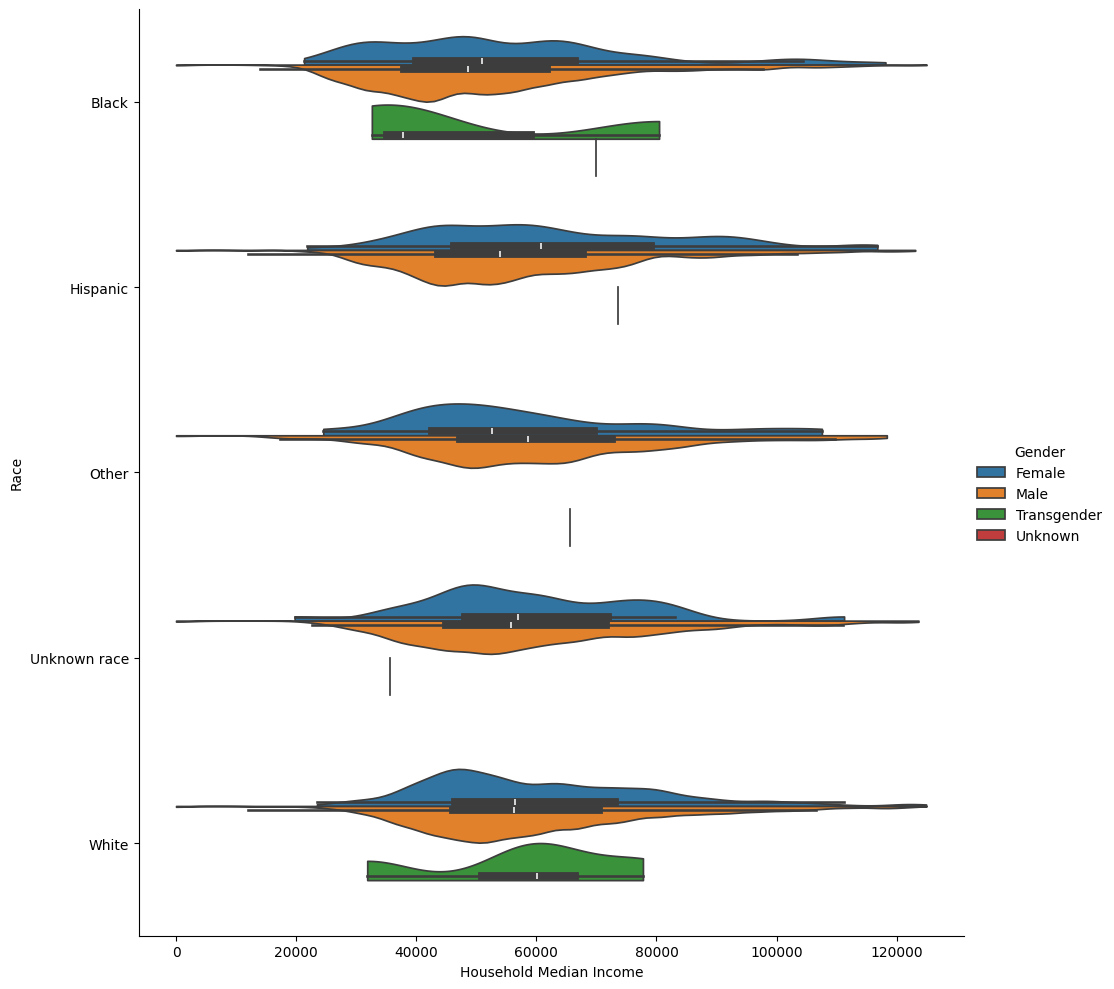

In [147]:
dfp['Date'] = pd.to_datetime(dfp['Date'], format='mixed')
dfp['irs_estimated_population'] = dfp['irs_estimated_population'].astype(int)

dfp_r = dfp[dfp['Age'] != 'Unknown'].copy()
dfp_r['Age'] = dfp_r['Age'].astype('int64')
dfp_r['Race'] = dfp_r['Race'].transform(lambda x: x if str(x) in ['Unknown race', 'White', 'Black', 'Hispanic'] else 'Other')
dfp_r['Race'] = dfp_r['Race'].astype(str)
dfp_r['Race'] = dfp_r['Race'].astype('category') # get rid of old categories

import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

mosaic(dfp, ['Race', 'Body Camera (Source: WaPo)'],
       title='Body Camera Recording by Victim\'s Race',
       label_rotation=90,
       gap=0.02,
       labelizer=lambda x: '')

mosaic(dfp, ['Geography', 'Official Disposition'],
       title='Official Disposition for the Plaintiff Officer by Geography',
       gap=0.01,
       labelizer=lambda x: '')

mosaic(dfp_r, ['Race', 'Official Disposition'],
       title='Official Disposition for the Plaintiff Officer by Victim\'s Race',
       gap=0.01,
       labelizer=lambda x: '')

sns.catplot(data=dfp, 
            x='Official Disposition', 
            y='Household Median Income', 
            kind='boxen')
sns.catplot(data=dfp_r, 
            x='Race', 
            y='Household Median Income', 
            kind='boxen')

sns.catplot(
    data=dfp_r, x="Age", y="Race", hue="Gender",
    kind="violin", bw_adjust=.5, cut=0, split=True,
    height = 10)

sns.catplot(
    data=dfp_r, x="Age", y="Armed?", hue="Gender",
    kind="violin", bw_adjust=.5, cut=0, split=True,
    height = 10)

sns.catplot(
    data=dfp_r[dfp_r['Household Median Income'] < 125000], x="Household Median Income", y="Race", hue="Gender",
    kind="violin", bw_adjust=.5, cut=0, split=True,
    height = 10)


In [122]:

""" dfp['State_County'] = dfp['State'].astype(str) + '_' + dfp['County'].astype(str)
dfp['State_County'] = dfp['State_County'].astype('category')

sum_irs_pop = dfp.groupby('State_County')['irs_estimated_population'].sum()
counts = dfp.groupby('State_County').agg({
    'State': lambda x: x.iloc[0],
    'Zipcode': 'count',  # counting total records in each county
    'Geography': lambda x: x.value_counts().to_dict(),
    'Gender': lambda x: x.value_counts().to_dict(),
    'Race': lambda x: x.value_counts().to_dict(),
    'Official Disposition': lambda x: x.value_counts().to_dict(),
    'Off-Duty Killing?': lambda x: x.value_counts().to_dict(),
    'Link to news article or photo of official document': lambda x: x.value_counts().to_dict(),
    'URL of image of victim': lambda x: x.value_counts().to_dict(),
    'Body Camera (Source: WaPo)': lambda x: x.value_counts().to_dict(),
})
dfg = sum_irs_pop.to_frame().merge(counts, on='State_County')
dfg """

" dfp['State_County'] = dfp['State'].astype(str) + '_' + dfp['County'].astype(str)\ndfp['State_County'] = dfp['State_County'].astype('category')\n\nsum_irs_pop = dfp.groupby('State_County')['irs_estimated_population'].sum()\ncounts = dfp.groupby('State_County').agg({\n    'State': lambda x: x.iloc[0],\n    'Zipcode': 'count',  # counting total records in each county\n    'Geography': lambda x: x.value_counts().to_dict(),\n    'Gender': lambda x: x.value_counts().to_dict(),\n    'Race': lambda x: x.value_counts().to_dict(),\n    'Official Disposition': lambda x: x.value_counts().to_dict(),\n    'Off-Duty Killing?': lambda x: x.value_counts().to_dict(),\n    'Link to news article or photo of official document': lambda x: x.value_counts().to_dict(),\n    'URL of image of victim': lambda x: x.value_counts().to_dict(),\n    'Body Camera (Source: WaPo)': lambda x: x.value_counts().to_dict(),\n})\ndfg = sum_irs_pop.to_frame().merge(counts, on='State_County')\ndfg "

The data is well setup for analysis, however I've sunk enough time so far- been learning a lot. I'm going to submit this here and wait for feedback before going further, I think I've fulfilled the assignment.